<a href="https://colab.research.google.com/github/RadhikaR88/Instacart/blob/master/Instacart_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instacart - Market-Basket Analysis**

Instacart is a mobile app offering grocery delivery and pick-up services. It is popular in United States for offering online-shopping experience from local retailers. The functioning of Instacart involves a Consumer, who places the order and schedules a time for delivery ; a Shopper, who picks and full-fills the order by delivering the items to the Consumer in the schedule time period.

In this project, we are using the Instacart app data which was made available to the public as part of a competition on Kaggle.Link to the kaggle competition is - https://www.kaggle.com/c/instacart-market-basket-analysis/data . The objective of this analysis is to predict the future orders of customers based on their purchase history. 

In terms of value-add, being able to forecast the future items that are likely to be purchased would be valuable for operations planning such as assigning shoppers to full-fill orders which contain similar items or planning deliveries to common locations. This could additionally be vital in improving the services provided by the Instacart , thereby enhancing user experience in receiving their orders in the fastest times. 


In [1]:
# Analysis
import pandas as pd
import numpy as np
import os

# plots 
import seaborn as sns
import matplotlib.pyplot as plt

# summary stats
from numpy import percentile

#association analysis
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# mount drive

from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/Instacart/Data'

/content/gdrive/My Drive/Instacart/Data


**Introduction**

The data provided by Instacart has 6 files as below each containing information vital to our Market-Basket analysis
1. aisles
2. departments
3. orders
4. products
5. prior orders
6. train - orders

In [0]:
df_aisles = pd.read_csv('aisles.csv', index_col=None)
df_departments = pd.read_csv('departments.csv',index_col=None)
df_orders = pd.read_csv('orders.csv', index_col=None)
df_products = pd.read_csv('products.csv',index_col=None)
df_prior = pd.read_csv('order_products__prior.csv',index_col=None)
df_train = pd.read_csv('order_products__train.csv',index_col=None)

In [13]:
# Aisles

print('Rows and Columns of Aisle data : ',df_aisles.shape)
#print('\nData type of columns : ',df_aisles.dtypes)
print('\nUnique Aisles : ',df_aisles['aisle_id'].nunique())
df_aisles.head()

Rows and Columns of Aisle data :  (134, 2)

Unique Aisles :  134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
# Department

print('Rows and Columns of Departments data : ',df_departments.shape)
#print('\nData type of columns : ',df_departments.dtypes)
print('\nUnique Departments : ',df_departments['department_id'].nunique())
df_departments.head()

Rows and Columns of Departments data :  (21, 2)

Unique Departments :  21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
# Product

print('Rows and Columns of Orders data : ',df_products.shape)
#print('\nData type of columns : ',df_products.dtypes)
print('\nUnique Products : ',df_products['product_id'].nunique())
df_products.head()

Rows and Columns of Orders data :  (49688, 4)

Unique Products :  49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
# orders

print('Rows and Columns of Orders data : ',df_orders.shape)
#print('\nData type of columns : ',df_orders.dtypes)
print('\nUnique Orders : ',df_orders['order_id'].nunique())
print('\nUnique Users : ',df_orders['user_id'].nunique())
print('\nUnique eval sets : ',df_orders['eval_set'].unique())
df_orders.groupby('user_id').head()

Rows and Columns of Orders data :  (3421083, 7)

Unique Orders :  3421083

Unique Users :  206209

Unique eval sets :  ['prior' 'train' 'test']


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421069,3154581,206209,prior,1,3,11,NaN
3421070,1889163,206209,prior,2,3,17,7.0
3421071,1542354,206209,prior,3,5,11,30.0
3421072,688306,206209,prior,4,1,10,30.0


In [17]:
# Prior Orders

print('Rows and Columns of Orders data : ',df_prior.shape)
#print('\nData type of columns : ',df_prior.dtypes)
print('\nUnique Orders : ',df_prior['order_id'].nunique())
print('\nUnique Products : ',df_prior['product_id'].nunique())
df_prior.head()

Rows and Columns of Orders data :  (32434489, 4)

Unique Orders :  3214874

Unique Products :  49677


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [18]:
# train 

print('Rows and Columns of Orders data : ',df_train.shape)
#print('\nData type of columns : ',df_train.dtypes)
print('\nUnique Orders : ',df_train['order_id'].nunique())
print('\nUnique Products : ',df_train['product_id'].nunique())
df_train.head()

Rows and Columns of Orders data :  (1384617, 4)

Unique Orders :  131209

Unique Products :  39123


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [19]:
# test orders

cond = df_orders['eval_set']=='test'
print('Test eval_set :')
cond = df_orders['eval_set']=='test'
df_test = df_orders[cond]
print('Unique orders : ',df_test['order_id'].nunique())
print('Unique users : ',df_test['user_id'].nunique())
df_test.head()

Test eval_set :
Unique orders :  75000
Unique users :  75000


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [22]:
# columns with missing values

print('Columns with missing values')
print(df_orders.columns[df_orders.isnull().any()].tolist())
df_orders.isnull().sum()

Columns with missing values
['days_since_prior_order']


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [23]:
#  Order Volume per User

df_order_vol=df_orders.groupby('user_id')['order_id'].nunique().reset_index().sort_values('order_id',ascending=True)

# change column name
df_order_vol.columns = ['user_id','order_count']
df_order_vol.head()

,user_id,order_count
127632,127633,4
74146,74147,4
160569,160570,4
160559,160560,4
74170,74171,4


Text(0.5, 1.0, 'Order Volume Distribution per User')

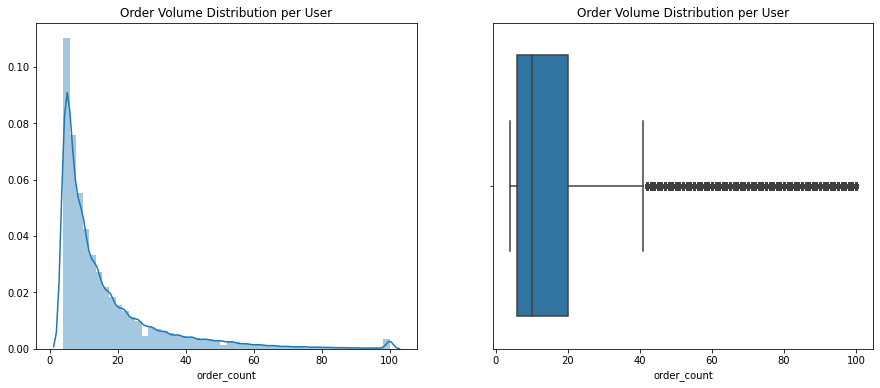

In [24]:
# Plotting Distirubtion of Order Volume

fig, axes = plt.subplots(ncols=2,figsize=(15,6))
fig.subplots_adjust(hspace=2)

# Distribution plot
sns.distplot(df_order_vol['order_count'], ax=axes[0])
axes[0].set_title('Order Volume Distribution per User')

# Boxplot
sns.boxplot(df_order_vol['order_count'],ax=axes[1])
axes[1].set_title('Order Volume Distribution per User')

In [25]:
# 5 summary stats of the Order volume per user

print('\n5-Point Summary of the Order Volume :')
print('\nNumber of orders per user')

quartiles = percentile(df_order_vol['order_count'],[20,50,75])

min_ord, max_ord = df_order_vol['order_count'].min(), df_order_vol['order_count'].max()

print('\nMin    : %.3f'%min_ord)
print('Q1     : %.3f'%quartiles[0])
print('Median : %.3f'%quartiles[1])
print('Q3     : %.3f'%quartiles[2])
print('Max    : %.3f'%max_ord)


5-Point Summary of the Order Volume :

Number of orders per user

Min    : 4.000
Q1     : 5.000
Median : 10.000
Q3     : 20.000
Max    : 100.000


In [26]:
# spearate transaction data - training data with prior orders
cond=df_orders['eval_set']!='test'
df_txn=df_orders[cond]
print('\nOrder data excluding test data')
print(df_txn.shape)
print('unique orders : ',df_txn['order_id'].nunique())
print('unique users : ',df_txn['user_id'].nunique())
df_txn.head()


Order data excluding test data
(3346083, 7)
unique orders :  3346083
unique users :  206209


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


**Visualization**

In [27]:
# cross tab of Order Times

df_order_hour=df_txn.groupby('order_hour_of_day')['order_id'].nunique().reset_index().sort_values('order_id',ascending=True)

# change column name
df_order_hour.columns = ['order_hour_of_day','frequency']
df_order_hour.columns

df_order_hour.sort_values('order_hour_of_day', inplace=True)
df_order_hour.head()

,order_hour_of_day,frequency
0,0,22224
1,1,12103
2,2,7375
3,3,5343
4,4,5393


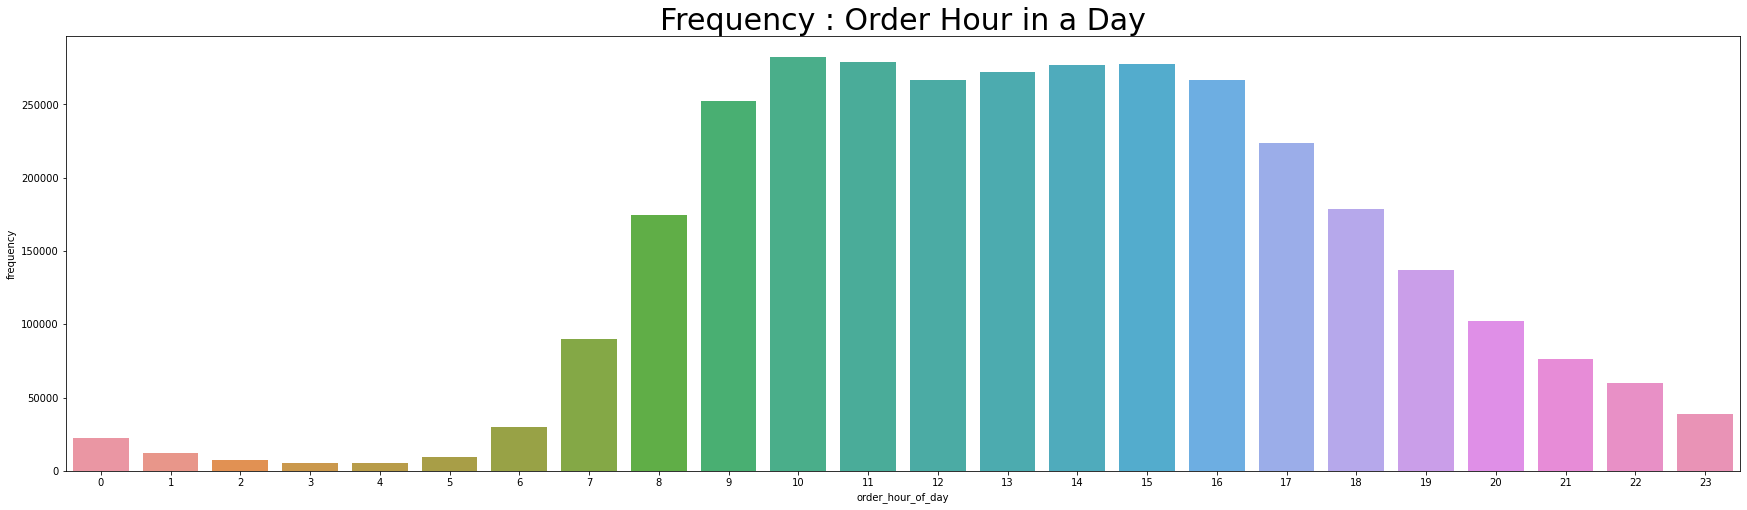

In [28]:
plt.figure(figsize=(30,8))
plt.title('Frequency : Order Hour in a Day', fontsize=30)
sns.barplot(x='order_hour_of_day',y='frequency',data=df_order_hour)

In [29]:
# 5 summary stats of the Order volume per user

print('\n5-Point Summary of the Order hour of the Day :')
print('\nNumber of orders per user')

quartiles = percentile(df_order_hour['order_hour_of_day'],[20,50,75])

min_hr, max_hr = df_order_hour['order_hour_of_day'].min(), df_order_hour['order_hour_of_day'].max()

print('\nMin    : %.3f'%min_hr)
print('Q1     : %.3f'%quartiles[0])
print('Median : %.3f'%quartiles[1])
print('Q3     : %.3f'%quartiles[2])
print('Max    : %.3f'%max_hr)


5-Point Summary of the Order hour of the Day :

Number of orders per user

Min    : 0.000
Q1     : 4.600
Median : 11.500
Q3     : 17.250
Max    : 23.000


In [30]:
# cross tab of Wait time between new orders

df_order_gap=df_txn.groupby('days_since_prior_order')['order_id'].nunique().reset_index().sort_values('order_id',ascending=True)

# change column name
df_order_gap.columns = ['days_since_prior_order','frequency']
df_order_gap.columns

df_order_gap.sort_values('days_since_prior_order', inplace=True)
df_order_gap.head()

,days_since_prior_order,frequency
0,0.0,66562
1,1.0,143727
2,2.0,191219
3,3.0,214681
4,4.0,219094


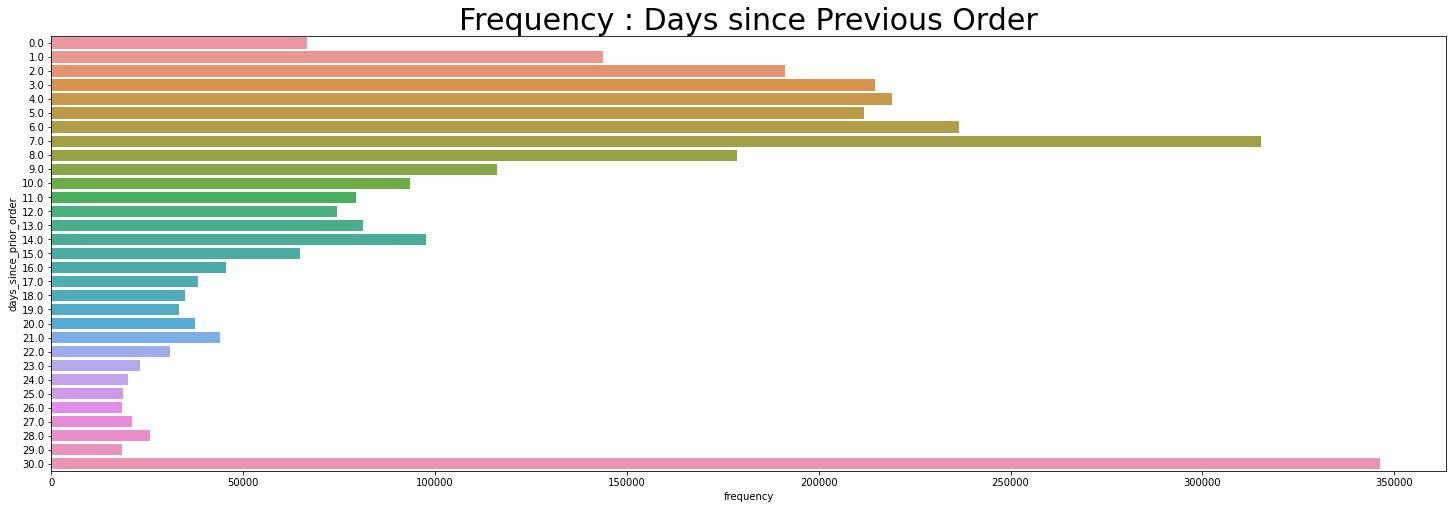

In [31]:
plt.figure(figsize=(25,8))
plt.title('Frequency : Days since Previous Order', fontsize=30)
sns.barplot(y='days_since_prior_order',x='frequency',data=df_order_gap, orient='h')

In [32]:
# cross tab of frequency for order days in a week

df_order_dow=df_txn.groupby('order_dow')['order_id'].nunique().reset_index().sort_values('order_id',ascending=True)

# change column name
df_order_dow.columns = ['order_dow','frequency']
df_order_dow.columns

df_order_dow.sort_values('order_dow', inplace=True)
df_order_dow.head(7)

,order_dow,frequency
0,0,585237
1,1,576377
2,2,458074
3,3,428087
4,4,417171
5,5,443388
6,6,437749


<BarContainer object of 7 artists>

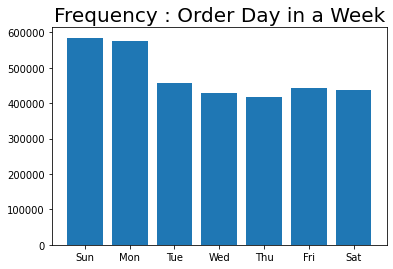

In [33]:
#plt.figure(figsize=(30,8))
plt.title('Frequency : Order Day in a Week', fontsize=20)
days=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
x=np.arange(0,7)
plt.xticks(x,days)
plt.bar(x='order_dow',height='frequency',data=df_order_dow)

In [34]:
# Join product details for prior and train data

df_tot = pd.concat([df_prior, df_train])
print(df_tot.shape)
print('Unique orders : ',df_tot['order_id'].nunique())
print('Unique products : ',df_tot['product_id'].nunique())
df_tot.head()

(33819106, 4)
Unique orders :  3346083
Unique products :  49685


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [36]:
# number of products per order

df_ord_prd_cnt = df_tot.groupby('order_id')['product_id'].nunique().reset_index()
df_ord_prd_cnt.columns=['order_id','product_count']
df_ord_prd_cnt.head()

,order_id,product_count
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26


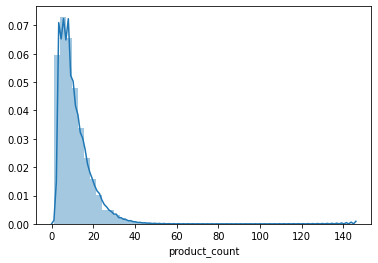

In [37]:
sns.distplot(df_ord_prd_cnt['product_count'])

In [38]:
# 5 summary stats of the Order volume per user

print('\n5-Point Summary of the Product count per Order  :')
print('\nNumber of products per order')

quartiles = percentile(df_ord_prd_cnt['product_count'],[20,50,75])

min_ct, max_ct = df_ord_prd_cnt['product_count'].min(), df_ord_prd_cnt['product_count'].max()

print('\nMin    : %.3f'%min_ct)
print('Q1     : %.3f'%quartiles[0])
print('Median : %.3f'%quartiles[1])
print('Q3     : %.3f'%quartiles[2])
print('Max    : %.3f'%max_ct)


5-Point Summary of the Product count per Order  :

Number of products per order

Min    : 1.000
Q1     : 4.000
Median : 8.000
Q3     : 14.000
Max    : 145.000


In [39]:
df_tot.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [40]:
# Combine product infromation with 

df_order_freq = pd.merge(df_tot[['order_id','product_id']],df_products, on='product_id' )
print(df_order_freq.shape)
print('Unique orders : ',df_order_freq['order_id'].nunique())
print('Unique products : ',df_order_freq['product_id'].nunique())
df_order_freq.head()

(33819106, 5)
Unique orders :  3346083
Unique products :  49685


,order_id,product_id,product_name,aisle_id,department_id
0,2,33120,Organic Egg Whites,86,16
1,26,33120,Organic Egg Whites,86,16
2,120,33120,Organic Egg Whites,86,16
3,327,33120,Organic Egg Whites,86,16
4,390,33120,Organic Egg Whites,86,16


In [41]:
# product frequency

df_prod_freq = df_order_freq.groupby('product_id')['order_id'].nunique().reset_index().sort_values('order_id',ascending=False)
df_prod_freq.columns = ['product_id','frequency']
df_prod_freq=pd.merge(df_prod_freq, df_products[['product_id','product_name']], on='product_id')
print(df_prod_freq.shape)
#print('Unique orders : ',df_prod_freq['order_id'].nunique())
print('Unique products : ',df_prod_freq['product_id'].nunique())
df_prod_freq.head()

(49685, 3)
Unique products :  49685


,product_id,frequency,product_name
0,24852,491291,Banana
1,13176,394930,Bag of Organic Bananas
2,21137,275577,Organic Strawberries
3,21903,251705,Organic Baby Spinach
4,47209,220877,Organic Hass Avocado


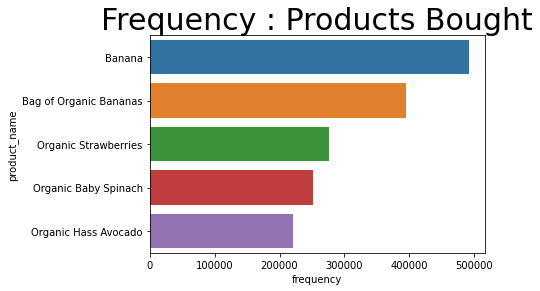

In [64]:
#plt.figure(figsize=(25,10))
plt.title('Frequency : Products Bought', fontsize=30)
sns.barplot(y='product_name',x='frequency',data=df_prod_freq.head(5), orient='h')

In [43]:
# aisle frequency

df_aisle_freq = df_order_freq.groupby('aisle_id')['order_id'].nunique().reset_index().sort_values('order_id',ascending=False)
df_aisle_freq.columns = ['aisle_id','frequency']
df_aisle_freq=pd.merge(df_aisle_freq,df_aisles, on='aisle_id')
print(df_aisle_freq.shape)
#print('Unique orders : ',df_aisle_freq['order_id'].nunique())
print('Unique aisles : ',df_aisle_freq['aisle_id'].nunique())
df_aisle_freq.head()

(134, 3)
Unique aisles :  134


,aisle_id,frequency,aisle
0,24,1862949,fresh fruits
1,83,1486803,fresh vegetables
2,123,1229500,packaged vegetables fruits
3,120,880330,yogurt
4,84,815345,milk


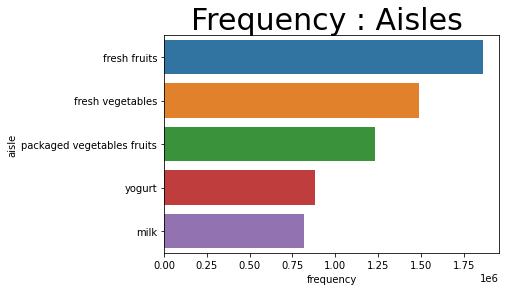

In [66]:
#plt.figure(figsize=(25,10))
plt.title('Frequency : Aisles ', fontsize=30)
sns.barplot(y='aisle',x='frequency',data=df_aisle_freq.head(5), orient='h')

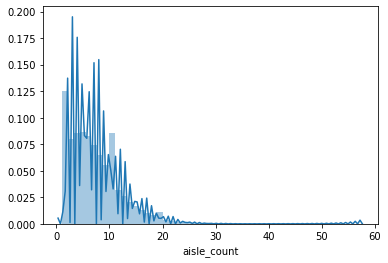

In [45]:
# count aisles per order

df_ord_asl_cnt = df_order_freq.groupby('order_id')['aisle_id'].nunique().reset_index()
df_ord_asl_cnt.columns=['order_id','aisle_count']
#df_ord_asl_cnt.head()
sns.distplot(df_ord_asl_cnt['aisle_count'])

In [46]:
# 5 summary stats of the aisles count per order

print('\n5-Point Summary of the Aisle count per Order  :')
print('\nNumber of aisles per order')

quartiles = percentile(df_ord_asl_cnt['aisle_count'],[20,50,75])

min_ct, max_ct = df_ord_asl_cnt['aisle_count'].min(), df_ord_asl_cnt['aisle_count'].max()

print('\nMin    : %.3f'%min_ct)
print('Q1     : %.3f'%quartiles[0])
print('Median : %.3f'%quartiles[1])
print('Q3     : %.3f'%quartiles[2])
print('Max    : %.3f'%max_ct)


5-Point Summary of the Aisle count per Order  :

Number of aisles per order

Min    : 1.000
Q1     : 3.000
Median : 6.000
Q3     : 10.000
Max    : 57.000


In [47]:
# department of most purchased proudcts
df_dept_count = df_order_freq.groupby('department_id')['order_id'].nunique().reset_index().sort_values('order_id',ascending=False)
df_dept_count.columns=['department_id','frequency']
df_dept_count = pd.merge(df_dept_count[['department_id','frequency']],df_departments, on='department_id' )
df_dept_count.head()

,department_id,frequency,department
0,4,2506247,produce
1,16,2264738,dairy eggs
2,7,1518833,beverages
3,19,1448749,snacks
4,1,1232089,frozen


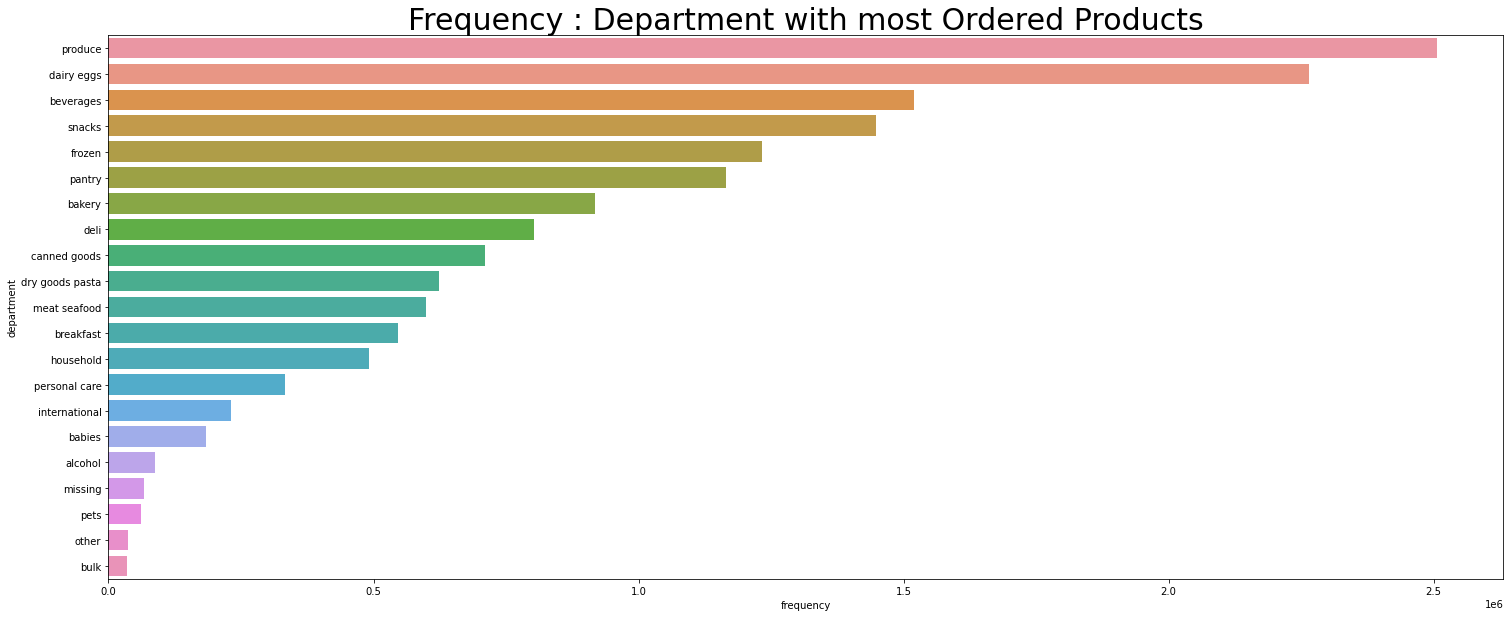

In [48]:
plt.figure(figsize=(25,10))
plt.title('Frequency : Department with most Ordered Products', fontsize=30)
sns.barplot(y='department',x='frequency',data=df_dept_count, orient='h')

In [49]:

df_order_freq=pd.merge(df_order_freq, df_aisles ,on='aisle_id')
print(df_order_freq.shape)
print('\nUnique orders : ',df_order_freq['order_id'].nunique())
print('\nUnique products : ',df_order_freq['product_id'].nunique())
print('\nUnique aisles : ',df_order_freq['aisle_id'].nunique())
df_order_freq.head()

(33819106, 6)

Unique orders :  3346083

Unique products :  49685

Unique aisles :  134


,order_id,product_id,product_name,aisle_id,department_id,aisle
0,2,33120,Organic Egg Whites,86,16,eggs
1,26,33120,Organic Egg Whites,86,16,eggs
2,120,33120,Organic Egg Whites,86,16,eggs
3,327,33120,Organic Egg Whites,86,16,eggs
4,390,33120,Organic Egg Whites,86,16,eggs


**Subsetting on Product Data For Association Analysis**

In [50]:
df_prd_subset=df_order_freq[['order_id','product_name']]
print(df_prd_subset.shape)

(33819106, 2)


**Subsetting on Aisle Data For Association Analysis**

In [52]:
# subset
df_asl_subset = df_order_freq[['order_id','aisle']]
print(df_asl_subset.shape)
print('\nUnique orders : ',df_asl_subset['order_id'].nunique())
df_asl_subset.head()

(33819106, 2)

Unique orders :  3346083


,order_id,aisle
0,2,eggs
1,26,eggs
2,120,eggs
3,327,eggs
4,390,eggs


In [53]:
# transform to dummy variables

df_asl_subset=df_asl_subset.groupby(['order_id','aisle'])['aisle'].count().unstack().reset_index().fillna(0).set_index('order_id')
print(df_asl_subset.shape)
#print('\nUnique orders : ',df_asl_subset['order_id'].nunique())
df_asl_subset.head()

(3346083, 134)


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,...,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
# convert data to binary
df_asl_subset.astype('uint8')

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,...,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,...,0,1,1,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3421080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3421081,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
# convert all > 1 aisle counts to 1 : there could be multiple products bought from the same aisle in a single order
# df_order_freq[df_order_freq['order_id']==4]  # use code to verify data

def convert_binary(x):
  if x<=0:
    return 0
  if x>0:
    return 1

df_binary=df_asl_subset.applymap(convert_binary)
df_binary.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,...,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [0]:
df_binary.shape

(3346083, 134)

In [0]:
df_binary.to_csv('Order_Aisle_Dummy_Binary.csv')

**Aprior Analysis**

In [0]:
df_binary=pd.read_csv('Order_Aisle_Dummy_Binary.csv')
df_binary=df_binary.set_index('order_id')

In [5]:
print(df_binary.shape)
df_binary.head(10)

(3346083, 134)


,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,...,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [0]:
# import library
from mlxtend.frequent_patterns import apriori, association_rules

In [57]:
# generating itemsets
df_freq_itemsets = apriori(df_binary,min_support=0.07,use_colnames=True)
print(df_freq_itemsets.shape)
df_freq_itemsets.head()

(83, 2)


,support,itemsets
0,0.076715,(baking ingredients)
1,0.163958,(bread)
2,0.074770,(butter)
3,0.073715,(canned jarred vegetables)
4,0.092692,(cereal)


In [58]:
df_freq_itemsets.tail()

,support,itemsets
78,0.105528,"(packaged vegetables fruits, fresh fruits, yog..."
79,0.072717,"(packaged vegetables fruits, milk, fresh veget..."
80,0.081288,"(packaged vegetables fruits, fresh vegetables,..."
81,0.087746,"(yogurt, packaged vegetables fruits, fresh veg..."
82,0.076052,"(yogurt, packaged vegetables fruits, fresh fru..."


In [67]:
df_freq_itemsets.sort_values('support', ascending=False)

,support,itemsets
12,0.556755,(fresh fruits)
14,0.444341,(fresh vegetables)
25,0.367445,(packaged vegetables fruits)
43,0.318137,"(fresh fruits, fresh vegetables)"
48,0.270937,"(packaged vegetables fruits, fresh fruits)"
...,...,...
79,0.072717,"(packaged vegetables fruits, milk, fresh veget..."
45,0.072294,"(lunch meat, fresh fruits)"
69,0.072142,"(fresh fruits, fresh vegetables, bread)"
8,0.070721,(dry pasta)


In [59]:
# generate rules
df_rules = association_rules(df_freq_itemsets,metric="lift",min_threshold=1)
print(df_rules.shape)
df_rules

(162, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(bread),0.556755,0.163958,0.112390,0.201865,1.231202,0.021105,1.047495
1,(bread),(fresh fruits),0.163958,0.556755,0.112390,0.685478,1.231202,0.021105,1.409266
2,(fresh vegetables),(bread),0.444341,0.163958,0.091134,0.205098,1.250921,0.018280,1.051755
3,(bread),(fresh vegetables),0.163958,0.444341,0.091134,0.555836,1.250921,0.018280,1.251021
4,(packaged vegetables fruits),(bread),0.367445,0.163958,0.077075,0.209761,1.279358,0.016830,1.057961
...,...,...,...,...,...,...,...,...,...
157,"(fresh fruits, fresh vegetables)","(packaged vegetables fruits, yogurt)",0.318137,0.127933,0.076052,0.239054,1.868584,0.035352,1.146030
158,(yogurt),"(packaged vegetables fruits, fresh fruits, fre...",0.263093,0.187271,0.076052,0.289069,1.543587,0.026782,1.143190
159,(packaged vegetables fruits),"(fresh fruits, yogurt, fresh vegetables)",0.367445,0.117873,0.076052,0.206975,1.755916,0.032740,1.112357
160,(fresh fruits),"(packaged vegetables fruits, fresh vegetables,...",0.556755,0.087746,0.076052,0.136598,1.556746,0.027199,1.056581


In [61]:
df_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.087746,0.556755,0.076052,0.866726,1.556746,0.027199,3.325820
41,(fresh herbs),(fresh vegetables),0.093564,0.444341,0.079047,0.844839,1.901328,0.037472,3.581166
125,"(packaged vegetables fruits, yogurt)",(fresh fruits),0.127933,0.556755,0.105528,0.824872,1.481570,0.034301,2.530974
101,"(fresh vegetables, yogurt)",(fresh fruits),0.144146,0.556755,0.117873,0.817736,1.468754,0.037619,2.431887
106,"(packaged vegetables fruits, milk)",(fresh fruits),0.107792,0.556755,0.087596,0.812640,1.459600,0.027582,2.365739
...,...,...,...,...,...,...,...,...,...
12,(fresh fruits),(crackers),0.556755,0.114835,0.075428,0.135477,1.179756,0.011493,1.023877
116,(fresh fruits),"(milk, yogurt)",0.556755,0.095293,0.074343,0.133530,1.401260,0.021289,1.044130
25,(fresh fruits),(lunch meat),0.556755,0.104121,0.072294,0.129848,1.247086,0.014324,1.029566
73,(fresh fruits),"(fresh vegetables, bread)",0.556755,0.091134,0.072142,0.129576,1.421820,0.021403,1.044165


In [72]:
#df_rules[(df_rules.lift>1.5) & (df_rules.confidence>0.6) ].sort_values(['lift','confidence'],ascending=False)
df_rules[(df_rules.lift>1.4) & (df_rules['antecedent support']>0.4)].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(fresh vegetables),(fresh herbs),0.444341,0.093564,0.079047,0.177896,1.901328,0.037472,1.102581
43,(fresh vegetables),(frozen produce),0.444341,0.123301,0.078111,0.175790,1.425692,0.023323,1.063683
49,(fresh vegetables),(packaged vegetables fruits),0.444341,0.367445,0.235156,0.529224,1.440283,0.071885,1.343645
73,(fresh fruits),"(fresh vegetables, bread)",0.556755,0.091134,0.072142,0.129576,1.421820,0.021403,1.044165
74,(fresh vegetables),"(fresh fruits, bread)",0.444341,0.112390,0.072142,0.162357,1.444591,0.022203,1.059652


In [0]:
df_rules.loc[149]['antecedents']

frozenset({'fresh fruits', 'fresh vegetables', 'packaged vegetables fruits'})

**Recomendations**

In [0]:
df_binary['fresh fruits'].sum()

1862949

In [0]:
df_freq_itemsets.head()


,support,itemsets
0,0.076715,(baking ingredients)
1,0.163958,(bread)
2,0.074770,(butter)
3,0.073715,(canned jarred vegetables)
4,0.092692,(cereal)


In [0]:
df_freq_itemsets.dtypes

support     float64
itemsets     object
dtype: object

In [0]:
val = df_freq_itemsets.loc[0,'itemsets']

In [0]:
val

frozenset({'baking ingredients'})

In [0]:
type(val)

frozenset

In [0]:
tmp = df_freq_itemsets.loc[df_freq_itemsets['itemsets'].apply(lambda x: ('fresh fruits' or 'bread') in x)]
#tmp = df_freq_itemsets.loc[df_freq_itemsets['itemsets'].apply(lambda x: str(x).contains('fresh fruits' or 'bread'))]
tmp.head()

,support,itemsets
12,0.556755,(fresh fruits)
33,0.112390,"(fresh fruits, bread)"
36,0.105499,"(chips pretzels, fresh fruits)"
39,0.075428,"(fresh fruits, crackers)"
40,0.095898,"(eggs, fresh fruits)"


In [0]:
df_tmp = tmp.iloc[:2]
df_tmp

,support,itemsets
12,0.556755,(fresh fruits)
33,0.112390,"(fresh fruits, bread)"


In [0]:
tmp = df_freq_itemsets.loc[df_freq_itemsets['itemsets'].apply(lambda x: ('bread') in x)]
#tmp = df_freq_itemsets.loc[df_freq_itemsets['itemsets'].apply(lambda x: str(x).contains('fresh fruits' or 'bread'))]
tmp.head()

,support,itemsets
1,0.163958,(bread)
33,0.112390,"(fresh fruits, bread)"
34,0.091134,"(fresh vegetables, bread)"
35,0.077075,"(bread, packaged vegetables fruits)"
69,0.072142,"(fresh vegetables, fresh fruits, bread)"


In [0]:
df_tmp.append(tmp.loc[1])

,support,itemsets
12,0.556755,(fresh fruits)
33,0.112390,"(fresh fruits, bread)"
1,0.163958,(bread)


In [0]:
tmp = df_rules.loc[df_rules['antecedents'].apply(lambda x: 'fresh fruits'in str(x))]
tmp.shape

(52, 9)

In [0]:
tmp.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(bread),0.556755,0.163958,0.112390,0.201865,1.231202,0.021105,1.047495
7,(fresh fruits),(chips pretzels),0.556755,0.167729,0.105499,0.189488,1.129731,0.012115,1.026847
12,(fresh fruits),(crackers),0.556755,0.114835,0.075428,0.135477,1.179756,0.011493,1.023877
15,(fresh fruits),(eggs),0.556755,0.137402,0.095898,0.172244,1.253575,0.019398,1.042092
18,(fresh fruits),(fresh herbs),0.556755,0.093564,0.070103,0.125914,1.345752,0.018011,1.037010
21,(fresh fruits),(fresh vegetables),0.556755,0.444341,0.318137,0.571413,1.285977,0.070748,1.296489
23,(fresh fruits),(frozen produce),0.556755,0.123301,0.089555,0.160852,1.304546,0.020907,1.044749
24,(fresh fruits),(lunch meat),0.556755,0.104121,0.072294,0.129848,1.247086,0.014324,1.029566
27,(fresh fruits),(milk),0.556755,0.243671,0.163932,0.294442,1.208355,0.028267,1.071958
28,(fresh fruits),(packaged cheese),0.556755,0.229850,0.155210,0.278775,1.212856,0.027239,1.067836


In [0]:
df_binary['bread'].sum()

548617

**Principal Component Analysis - Cluster Aisles**

Ref : https://towardsdatascience.com/instacart-market-basket-analysis-part-2-which-groups-of-customers-are-similar-618e88b0866d

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(df_binary)

pca_samples=pca.transform(df_binary)
ps=pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6,7,8,9
0,0.442257,-0.098874,-0.068572,-0.541722,0.465049,0.511569,-0.666442,-0.782159,-0.068637,-0.144992
1,0.144882,-0.764864,0.703620,-0.094573,-0.542076,0.108409,0.182906,0.246128,0.031500,0.320366
2,0.392359,-0.352034,0.236523,0.018947,-0.620855,0.944387,-0.120755,0.517515,0.447952,0.562638
3,-0.678203,0.725119,0.275772,0.569924,0.180540,-0.098441,-0.110633,0.562788,-0.691985,-0.292088
4,1.096969,0.289571,0.210465,0.127808,-0.140145,-0.713686,0.623974,-0.802575,0.008533,-0.365810


In [0]:
ps.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

In [0]:
print(ps.shape)
ps.head()

(3346083, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.442257,-0.098874,-0.068572,-0.541722,0.465049,0.511569,-0.666442,-0.782159,-0.068637,-0.144992
1,0.144882,-0.764864,0.703620,-0.094573,-0.542076,0.108409,0.182906,0.246128,0.031500,0.320366
2,0.392359,-0.352034,0.236523,0.018947,-0.620855,0.944387,-0.120755,0.517515,0.447952,0.562638
3,-0.678203,0.725119,0.275772,0.569924,0.180540,-0.098441,-0.110633,0.562788,-0.691985,-0.292088
4,1.096969,0.289571,0.210465,0.127808,-0.140145,-0.713686,0.623974,-0.802575,0.008533,-0.365810


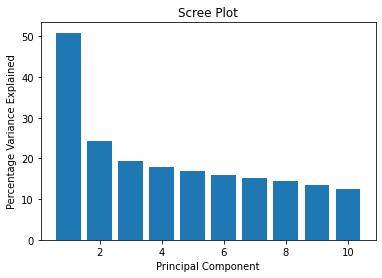

In [0]:
# screeplot

var = np.round(pca.explained_variance_*100,decimals=1)
plt.bar(x=range(1,len(var)+1), height=var)
plt.ylabel('Percentage Variance Explained')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [0]:
tocluster = pd.DataFrame(ps[['PC1','PC2']])
tocluster.head()

,PC1,PC2
0,0.442257,-0.098874
1,0.144882,-0.764864
2,0.392359,-0.352034
3,-0.678203,0.725119
4,1.096969,0.289571


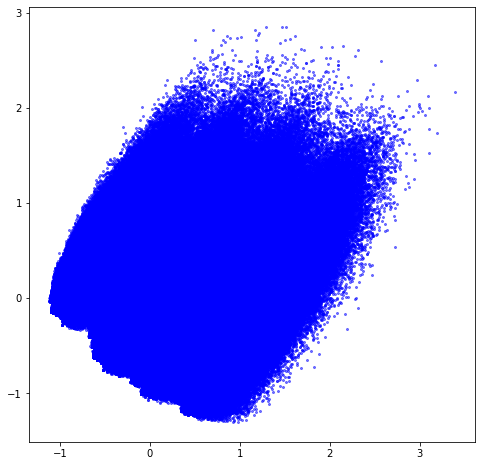

In [0]:
#tocluster = pd.DataFrame(ps[[4,1]])
fig=plt.figure(figsize=(8,8))
plt.plot(tocluster['PC1'],tocluster['PC2'],'o',markersize=2, color='blue',alpha=0.5, label='clus1')


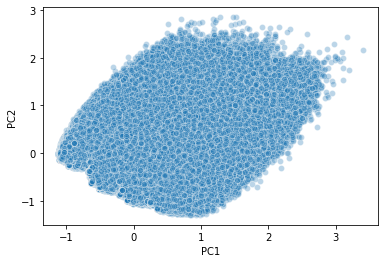

In [0]:
sns.scatterplot(x='PC1', y='PC2',palette=sns.color_palette("hls",10), data=ps,legend='full',alpha=0.3 )

**K-Means Clustering**

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_binary)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
centroids = kmeans.cluster_centers_
print(len(centroids))

4


In [0]:
cluster_pred = kmeans.fit_predict(df_binary)

In [0]:
len(cluster_pred)

3346083

In [0]:
df_cluster = pd.DataFrame({'cluster':cluster_pred})
df_cluster['cluster'].value_counts()

3    1241602
2     867692
0     701520
1     535269
Name: cluster, dtype: int64

**KCluster**

In [0]:
# k means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4, random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-0.03628969  0.55605942]
 [ 1.11629284  0.30262212]
 [-0.7133535  -0.00305127]
 [ 0.33226644 -0.49593555]]


['green', 'green', 'green', 'orange', 'blue', 'purple', 'purple', 'purple', 'blue', 'green']


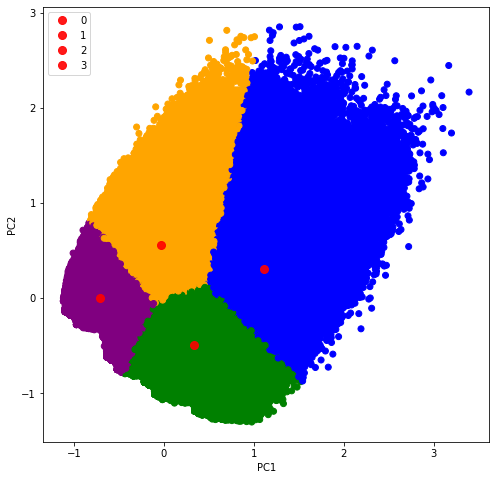

In [0]:
fig=plt.figure(figsize=(8,8))
colors=['orange','blue','purple','green']

colored = [colors[k] for k in c_preds]
print(colored[0:10])

plt.scatter(tocluster['PC1'],tocluster['PC2'], color=colored)

for ci,c in enumerate(centers):
  plt.plot(c[0],c[1],'o',markersize=8,color='red',alpha=0.9, label=''+str(ci))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

['orange', 'orange', 'green', 'purple', 'blue', 'purple', 'purple', 'purple', 'blue', 'orange']


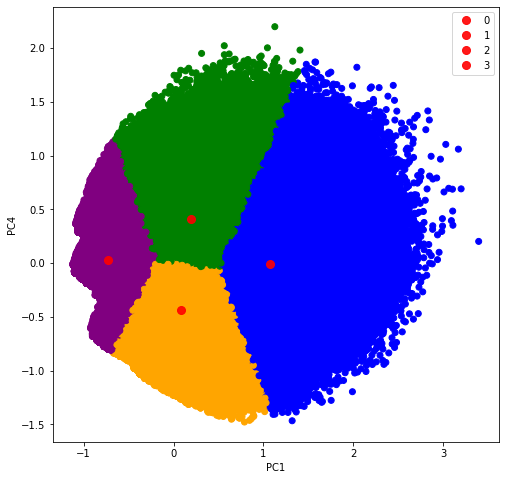

In [0]:
# k means along PC1 and PC4

tocluster = pd.DataFrame(ps[['PC1','PC4']])
#tocluster.head()

fig=plt.figure(figsize=(8,8))
colors=['orange','blue','purple','green']

colored = [colors[k] for k in c_preds]
print(colored[0:10])

plt.scatter(tocluster['PC1'],tocluster['PC4'], color=colored)

for ci,c in enumerate(centers):
  plt.plot(c[0],c[1],'o',markersize=8,color='red',alpha=0.9, label=''+str(ci))

plt.xlabel('PC1')
plt.ylabel('PC4')
plt.legend()
plt.show()

In [0]:
#plt.scatter(df_binary[:,0],df_binary[:,1],c=cluster_pred,s=50,cmap='viridis')

In [0]:
len(colored)

3346083

In [0]:
# user cluster
df_user_cluster = pd.DataFrame({'order_id':df_binary.index.values,'cluster':colored})
print(df_user_cluster.shape)
df_user_cluster.head()

(3346083, 2)


,order_id,cluster
0,1,green
1,2,green
2,3,green
3,4,orange
4,5,blue


In [0]:
df_user_cluster=pd.merge(df_user_cluster,df_orders[['order_id','user_id']], on='order_id')
print(df_user_cluster.shape)
df_user_cluster.head()

(3346083, 3)


,order_id,cluster,user_id
0,1,green,112108
1,2,green,202279
2,3,green,205970
3,4,orange,178520
4,5,blue,156122


In [0]:
user_cluster_count = df_user_cluster.groupby('cluster')['user_id'].nunique().reset_index()
user_cluster_count.columns = ['cluster','user_count']
print(user_cluster_count.shape)
user_cluster_count.head()

(4, 2)


,cluster,user_count
0,blue,97024
1,green,149958
2,orange,128294
3,purple,167070


In [0]:
ord_cluster_count = df_user_cluster.groupby('cluster')['order_id'].nunique().reset_index().sort_values('order_id')
ord_cluster_count.columns = ['cluster','order_count']
print(ord_cluster_count.shape)
ord_cluster_count.head()

(4, 2)


,cluster,order_count
0,blue,520771
2,orange,600725
1,green,984283
3,purple,1240304


In [0]:
df_user_cluster['cluster'].value_counts()

purple    1240304
green      984283
orange     600725
blue       520771
Name: cluster, dtype: int64

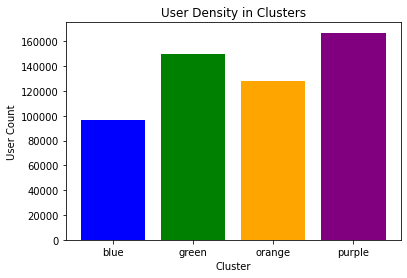

In [0]:
plt.bar(x=user_cluster_count['cluster'], height=user_cluster_count['user_count'], color=user_cluster_count['cluster'].unique())
plt.ylabel('User Count')
plt.xlabel('Cluster')
plt.title('User Density in Clusters')
plt.show()

**Visualizing Association Rules**

Ref : https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/

Text(0, 0.5, 'Confidence')

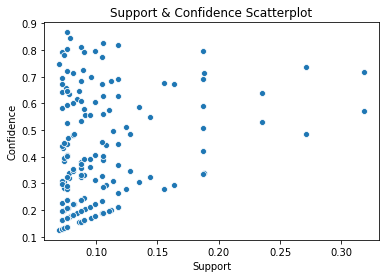

In [0]:
support = df_rules['support'].to_numpy()
confidence = df_rules['confidence'].to_numpy()
sns.scatterplot(x=support,y=confidence)
plt.title('Support & Confidence Scatterplot')
plt.xlabel('Support')
plt.ylabel('Confidence')

In [0]:
# draw graph

def draw_graph(rules, rules_to_show):
  import networkx as nx
  G1 = nx.DiGraph()

  color_map=[]
  N=50
  colors = np.random.rand(N)
  strs = ['R0','R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11']

  for i in range(rules_to_show):
    G1.add_nodes_from(["R"+str(i)])

    for a in rules.iloc[i]['antecedents']:
      G1.add_nodes_from([a])
      G1.add_edge(a,"R"+str(i),color=colors[i],weight=2)
      print(a)

    for c in rules.iloc[i]['consequents']:
      G1.add_nodes_from([c])
      print(c)
      G1.add_edge("R"+str(i),c,color=colors[i],weight=2)
    
    

    for node in G1:
      found_a_string=False
      for item in strs:
        if node==item:
          found_a_string=True
        if found_a_string:
          color_map.append('yellow')
        else:
          color_map.append('green')
    
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges] 
    
    pos = nx.spring_layout(G1, k=16, scale=1)
    
    print(edges)
    print('No error till here')
    print(color_map)
    print(len(color_map))
    print(type(G1))
    print(pos)
    nx.draw(G1, pos, edges=edges, node_color=None, edge_color=colors, width=weights, font_size=16, with_labels=False)
    

    for p in pos:
      pos[p][1] += 0.07
    nx.draw_networkx_labels(G1,pos)
    plt.show()

fresh fruits
bread
[('R0', 'bread'), ('fresh fruits', 'R0')]
No error till here
['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']
36
<class 'networkx.classes.digraph.DiGraph'>
{'R0': array([1.        , 0.32337941]), 'fresh fruits': array([-0.60938245,  0.66042219]), 'bread': array([-0.39061755, -0.9838016 ])}


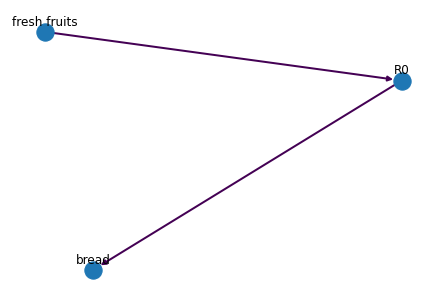

In [0]:
draw_graph(df_rules, 1)

In [0]:
df_rules.iloc[0]['antecedents']

frozenset({'fresh fruits'})

In [0]:
df_rules.loc[df_rules['consequents'].apply(lambda x: 'fresh fruits'in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(bread),(fresh fruits),0.163958,0.556755,0.112390,0.685478,1.231202,0.021105,1.409266
7,(chips pretzels),(fresh fruits),0.167729,0.556755,0.105499,0.628984,1.129731,0.012115,1.194677
13,(crackers),(fresh fruits),0.114835,0.556755,0.075428,0.656835,1.179756,0.011493,1.291639
15,(eggs),(fresh fruits),0.137402,0.556755,0.095898,0.697935,1.253575,0.019398,1.467380
19,(fresh herbs),(fresh fruits),0.093564,0.556755,0.070103,0.749254,1.345752,0.018011,1.767706
21,(fresh vegetables),(fresh fruits),0.444341,0.556755,0.318137,0.715974,1.285977,0.070748,1.560581
23,(frozen produce),(fresh fruits),0.123301,0.556755,0.089555,0.726313,1.304546,0.020907,1.619531
25,(lunch meat),(fresh fruits),0.104121,0.556755,0.072294,0.694322,1.247086,0.014324,1.450037
27,(milk),(fresh fruits),0.243671,0.556755,0.163932,0.672758,1.208355,0.028267,1.354487
29,(packaged cheese),(fresh fruits),0.229850,0.556755,0.155210,0.675264,1.212856,0.027239,1.364938


**Mining important assocations**

In [0]:
df_freq_itemsets.head()

,support,itemsets
0,0.076715,(baking ingredients)
1,0.163958,(bread)
2,0.074770,(butter)
3,0.073715,(canned jarred vegetables)
4,0.092692,(cereal)


In [0]:
df_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(bread),0.556755,0.163958,0.112390,0.201865,1.231202,0.021105,1.047495
1,(bread),(fresh fruits),0.163958,0.556755,0.112390,0.685478,1.231202,0.021105,1.409266
2,(bread),(fresh vegetables),0.163958,0.444341,0.091134,0.555836,1.250921,0.018280,1.251021
3,(fresh vegetables),(bread),0.444341,0.163958,0.091134,0.205098,1.250921,0.018280,1.051755
4,(bread),(packaged vegetables fruits),0.163958,0.367445,0.077075,0.470093,1.279358,0.016830,1.193710


In [0]:
# min - max of lift

df_rules.sort_values(by='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(water seltzer sparkling water),(fresh fruits),0.191574,0.556755,0.110243,0.575459,1.033594,0.003583,1.044056
36,(fresh fruits),(water seltzer sparkling water),0.556755,0.191574,0.110243,0.198010,1.033594,0.003583,1.008025
66,(water seltzer sparkling water),(packaged vegetables fruits),0.191574,0.367445,0.073575,0.384056,1.045208,0.003182,1.026969
67,(packaged vegetables fruits),(water seltzer sparkling water),0.367445,0.191574,0.073575,0.200235,1.045208,0.003182,1.010829
9,(fresh vegetables),(chips pretzels),0.444341,0.167729,0.080917,0.182105,1.085711,0.006388,1.017577
...,...,...,...,...,...,...,...,...,...
155,"(yogurt, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.127933,0.318137,0.076052,0.594466,1.868584,0.035352,1.681395
40,(fresh herbs),(fresh vegetables),0.093564,0.444341,0.079047,0.844839,1.901328,0.037472,3.581166
41,(fresh vegetables),(fresh herbs),0.444341,0.093564,0.079047,0.177896,1.901328,0.037472,1.102581
157,"(yogurt, fresh vegetables)","(fresh fruits, packaged vegetables fruits)",0.144146,0.270937,0.076052,0.527605,1.947336,0.036998,1.543334


In [0]:
df_rules[ (df_rules['lift']>1) & (df_rules['confidence']>0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(fresh herbs),(fresh fruits),0.093564,0.556755,0.070103,0.749254,1.345752,0.018011,1.767706
21,(fresh vegetables),(fresh fruits),0.444341,0.556755,0.318137,0.715974,1.285977,0.070748,1.560581
23,(frozen produce),(fresh fruits),0.123301,0.556755,0.089555,0.726313,1.304546,0.020907,1.619531
31,(packaged vegetables fruits),(fresh fruits),0.367445,0.556755,0.270937,0.737354,1.324378,0.066360,1.687614
39,(yogurt),(fresh fruits),0.263093,0.556755,0.187954,0.714404,1.283156,0.041476,1.551998
40,(fresh herbs),(fresh vegetables),0.093564,0.444341,0.079047,0.844839,1.901328,0.037472,3.581166
72,"(bread, fresh vegetables)",(fresh fruits),0.091134,0.556755,0.072142,0.791606,1.421820,0.021403,2.126952
78,"(milk, fresh vegetables)",(fresh fruits),0.124848,0.556755,0.099384,0.796037,1.429780,0.029874,2.173167
84,"(packaged cheese, fresh vegetables)",(fresh fruits),0.135239,0.556755,0.104650,0.773813,1.389863,0.029355,1.959642
90,"(packaged vegetables fruits, fresh vegetables)",(fresh fruits),0.235156,0.556755,0.187271,0.796368,1.430374,0.056347,2.176699


In [0]:
df_rules.sort_values(by=['lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
152,"(fresh fruits, packaged vegetables fruits)","(yogurt, fresh vegetables)",0.270937,0.144146,0.076052,0.280700,1.947336,0.036998,1.189843
157,"(yogurt, fresh vegetables)","(fresh fruits, packaged vegetables fruits)",0.144146,0.270937,0.076052,0.527605,1.947336,0.036998,1.543334
41,(fresh vegetables),(fresh herbs),0.444341,0.093564,0.079047,0.177896,1.901328,0.037472,1.102581
40,(fresh herbs),(fresh vegetables),0.093564,0.444341,0.079047,0.844839,1.901328,0.037472,3.581166
155,"(yogurt, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.127933,0.318137,0.076052,0.594466,1.868584,0.035352,1.681395
...,...,...,...,...,...,...,...,...,...
8,(chips pretzels),(fresh vegetables),0.167729,0.444341,0.080917,0.482426,1.085711,0.006388,1.073583
66,(water seltzer sparkling water),(packaged vegetables fruits),0.191574,0.367445,0.073575,0.384056,1.045208,0.003182,1.026969
67,(packaged vegetables fruits),(water seltzer sparkling water),0.367445,0.191574,0.073575,0.200235,1.045208,0.003182,1.010829
37,(water seltzer sparkling water),(fresh fruits),0.191574,0.556755,0.110243,0.575459,1.033594,0.003583,1.044056


In [0]:
df_rules.loc[151,'antecedents']

frozenset({'fresh vegetables', 'packaged vegetables fruits', 'yogurt'})

In [0]:
df_binary['fresh fruits'].sum()

1862949

In [0]:
df_binary['bread'].sum()

548617

In [0]:
col_sum = df_binary.sum(axis=0)
col_sum.sort_values()

aisle
frozen juice                     4488
beauty                           6111
baby bath body care              8257
baby accessories                 8380
eye ear care                     9136
                               ...   
milk                           815345
yogurt                         880330
packaged vegetables fruits    1229500
fresh vegetables              1486803
fresh fruits                  1862949
Length: 134, dtype: int64

In [0]:
#df_rules[df_rules['consequents']=='frozen juice']
df_rules.loc[df_rules['consequents'].apply(lambda x: 'frozen juice'in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [0]:
df_freq_itemsets.loc[df_freq_itemsets['itemsets'].apply(lambda x: 'frozen juice'in str(x))]

,support,itemsets


In [0]:
df_binary.shape[0]*0.07

234225.81000000003

In [0]:
col_sum[col_sum.values>234225].sort_values()

aisle
dry pasta                         236639
canned jarred vegetables          246655
frozen meals                      248483
butter                            250185
baking ingredients                256695
spreads                           260651
nuts seeds dried fruit            269827
soup broth bouillon               279278
hot dogs bacon sausage            281607
energy granola bars               289208
other creams cheeses              289739
soft drinks                       290821
juice nectars                     300253
cream                             306461
cereal                            310156
fresh herbs                       313074
fresh dips tapenades              328344
lunch meat                        348399
ice cream ice                     368635
crackers                          384247
frozen produce                    412577
refrigerated                      447010
eggs                              459758
bread                             548617
chips pret

In [0]:
df_freq_itemsets.loc[df_freq_itemsets['itemsets'].apply(lambda x: 'bread'in str(x))]

,support,itemsets
1,0.163958,(bread)
33,0.112390,"(fresh fruits, bread)"
34,0.091134,"(bread, fresh vegetables)"
35,0.077075,"(bread, packaged vegetables fruits)"
69,0.072142,"(fresh fruits, bread, fresh vegetables)"


In [0]:
df_rules.loc[df_rules['consequents'].apply(lambda x: 'crackers' in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(fresh fruits),(crackers),0.556755,0.114835,0.075428,0.135477,1.179756,0.011493,1.023877


In [0]:
df_rules.loc[df_rules['antecedents'].apply(lambda x: 'crackers' in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(crackers),(fresh fruits),0.114835,0.556755,0.075428,0.656835,1.179756,0.011493,1.291639


**Contingency Table**

In [0]:
df_contingency = df_binary[['fresh fruits','bread']]
df_contingency.shape

(3346083, 2)

In [0]:
colsum = df_contingency.sum(axis=0)
row_sum = df_contingency.sum(axis=1)
print(row_sum.shape)
print(colsum.shape)

(3346083,)
(2,)


In [163]:
colsum.head()

aisle
fresh fruits    1862949
bread            548617
dtype: int64

In [167]:
df_contingency.head()

aisle,fresh fruits,bread
order_id,,
1,1,0
2,0,0
3,0,1
4,0,0
5,1,0


In [168]:
# 
cond_X = (df_contingency['fresh fruits']==1) & (df_contingency['bread']==1)
df_contingency[cond_X].shape

(376065, 2)

In [169]:
cond_Xbar = (df_contingency['fresh fruits']==0) & (df_contingency['bread']==1)
print(df_contingency[cond_Xbar].shape)
df_contingency[cond_Xbar].head()

(172552, 2)


aisle,fresh fruits,bread
order_id,,
3,0,1
9,0,1
46,0,1
51,0,1
63,0,1


In [170]:
cond_Y = (df_contingency['fresh fruits']==1) & (df_contingency['bread']==0)
print(df_contingency[cond_Y].shape)
df_contingency[cond_Y].head()

(1486884, 2)


aisle,fresh fruits,bread
order_id,,
1,1,0
5,1,0
10,1,0
14,1,0
18,1,0


In [171]:
cond_Ybar = (df_contingency['fresh fruits']==0) & (df_contingency['bread']==0)
print(df_contingency[cond_Ybar].shape)
df_contingency[cond_Ybar].head()

(1310582, 2)


aisle,fresh fruits,bread
order_id,,
2,0,0
4,0,0
6,0,0
7,0,0
8,0,0


**Lift**

In [164]:
df_rules.sort_values(by='lift').head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(water seltzer sparkling water),(fresh fruits),0.191574,0.556755,0.110243,0.575459,1.033594,0.003583,1.044056
36,(fresh fruits),(water seltzer sparkling water),0.556755,0.191574,0.110243,0.198010,1.033594,0.003583,1.008025
66,(water seltzer sparkling water),(packaged vegetables fruits),0.191574,0.367445,0.073575,0.384056,1.045208,0.003182,1.026969
67,(packaged vegetables fruits),(water seltzer sparkling water),0.367445,0.191574,0.073575,0.200235,1.045208,0.003182,1.010829
9,(fresh vegetables),(chips pretzels),0.444341,0.167729,0.080917,0.182105,1.085711,0.006388,1.017577


In [41]:
df_liftrules = df_rules[df_rules['lift']>=1.5].sort_values(by='lift',ascending=False)
print(df_liftrules.shape)
df_liftrules.head()

(44, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
157,"(fresh fruits, packaged vegetables fruits)","(fresh vegetables, yogurt)",0.270937,0.144146,0.076052,0.280700,1.947336,0.036998,1.189843
152,"(fresh vegetables, yogurt)","(fresh fruits, packaged vegetables fruits)",0.144146,0.270937,0.076052,0.527605,1.947336,0.036998,1.543334
40,(fresh vegetables),(fresh herbs),0.444341,0.093564,0.079047,0.177896,1.901328,0.037472,1.102581
41,(fresh herbs),(fresh vegetables),0.093564,0.444341,0.079047,0.844839,1.901328,0.037472,3.581166
154,"(yogurt, packaged vegetables fruits)","(fresh vegetables, fresh fruits)",0.127933,0.318137,0.076052,0.594466,1.868584,0.035352,1.681395


In [64]:
df_liftrules = df_rules[(df_rules['lift']>=1.5) & (df_rules['confidence']>0.7)].sort_values(by='lift',ascending=False)
print(df_liftrules.shape)
df_liftrules.head()

(4, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(fresh herbs),(fresh vegetables),0.093564,0.444341,0.079047,0.844839,1.901328,0.037472,3.581166
150,"(packaged vegetables fruits, yogurt, fresh fru...",(fresh vegetables),0.105528,0.444341,0.076052,0.720677,1.621899,0.029161,1.989303
138,"(packaged cheese, packaged vegetables fruits)",(fresh vegetables),0.113829,0.444341,0.081288,0.714121,1.607146,0.030709,1.943688
149,"(fresh vegetables, yogurt, packaged vegetables...",(fresh fruits),0.087746,0.556755,0.076052,0.866726,1.556746,0.027199,3.325820


**Recomendation / Prediction**

In [42]:
df_test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [43]:
df_user3 = df_orders[df_orders['user_id']==3]
print(df_user3.shape)
df_user3.head(13)

(13, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [44]:
df_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [45]:
# map the user's product history based on order
df_user3 = pd.merge(df_user3,df_prior,on='order_id')
print(df_user3.shape)
df_user3.head()

(88, 10)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1374495,3,prior,1,1,14,NaN,9387,1,0
1,1374495,3,prior,1,1,14,NaN,17668,2,0
2,1374495,3,prior,1,1,14,NaN,15143,3,0
3,1374495,3,prior,1,1,14,NaN,16797,4,0
4,1374495,3,prior,1,1,14,NaN,39190,5,0


In [46]:
# map aisle information
df_user3 = pd.merge(df_user3,df_products[['product_id','aisle_id']],on='product_id')
print(df_user3.shape)
df_user3.head()

(88, 11)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id
0,1374495,3,prior,1,1,14,NaN,9387,1,0,24
1,2037211,3,prior,4,2,18,20.0,9387,3,1,24
2,2710558,3,prior,5,0,17,12.0,9387,2,1,24
3,1972919,3,prior,6,0,16,7.0,9387,3,1,24
4,1839752,3,prior,7,0,15,7.0,9387,9,1,24


In [47]:
# map aisle names
df_user3 = pd.merge(df_user3,df_aisles,on='aisle_id')
print(df_user3.shape)
df_user3.head()

(88, 12)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,aisle
0,1374495,3,prior,1,1,14,NaN,9387,1,0,24,fresh fruits
1,2037211,3,prior,4,2,18,20.0,9387,3,1,24,fresh fruits
2,2710558,3,prior,5,0,17,12.0,9387,2,1,24,fresh fruits
3,1972919,3,prior,6,0,16,7.0,9387,3,1,24,fresh fruits
4,1839752,3,prior,7,0,15,7.0,9387,9,1,24,fresh fruits


In [48]:
df_user3['order_id'].nunique()

12

In [49]:
df_user3=df_user3.groupby(['order_id','aisle']).nunique().iloc[:,1:3].reset_index()
df_user3=df_user3.iloc[:,:2]
df_user3.head()

,order_id,aisle
0,444309,crackers
1,444309,fresh fruits
2,444309,nuts seeds dried fruit
3,444309,other creams cheeses
4,444309,packaged cheese


In [50]:
# check if it contains the test order - not present
df_user3[df_user3['order_id']==2774568]

,order_id,aisle


In [51]:
# convert to one hot encoding
df_user3=df_user3.groupby(['order_id','aisle'])['aisle'].count().unstack().reset_index().fillna(0).set_index('order_id')
print(df_user3.shape)
df_user3.head()

(12, 16)


aisle,crackers,fresh fruits,fresh vegetables,frozen breakfast,ice cream ice,instant foods,nuts seeds dried fruit,other creams cheeses,packaged cheese,packaged vegetables fruits,paper goods,prepared meals,soy lactosefree,spreads,tea,water seltzer sparkling water
order_id,,,,,,,,,,,,,,,,
444309,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
521107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
676467,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1374495,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1402502,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [53]:
def convert_binary(x):
  if x<=0:
    return 0
  if x>0:
    return 1

# conver to binary and uint8
df_user3.astype('uint8')
df_user3=df_user3.applymap(convert_binary)
print(df_user3.shape)
df_user3.head()

(12, 16)


aisle,crackers,fresh fruits,fresh vegetables,frozen breakfast,ice cream ice,instant foods,nuts seeds dried fruit,other creams cheeses,packaged cheese,packaged vegetables fruits,paper goods,prepared meals,soy lactosefree,spreads,tea,water seltzer sparkling water
order_id,,,,,,,,,,,,,,,,
444309,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1
521107,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
676467,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1374495,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1402502,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1


In [54]:
# gererate itemsets for user 3
df_user3_itemsets = apriori(df_user3,min_support=0.01,use_colnames=True)
print(df_user3_itemsets.shape)
df_user3_itemsets.head()

(917, 2)


,support,itemsets
0,0.416667,(crackers)
1,1.000000,(fresh fruits)
2,0.333333,(fresh vegetables)
3,0.166667,(frozen breakfast)
4,0.333333,(ice cream ice)


In [55]:
df_user3['crackers'].sum()

5

In [65]:
user_3_recommendations = df_user3_itemsets[df_user3_itemsets.support>0.3] 
print(user_3_recommendations.shape)
user_3_recommendations.sort_values('support',ascending=False)

(27, 2)


,support,itemsets
1,1.000000,(fresh fruits)
38,0.916667,"(soy lactosefree, fresh fruits)"
12,0.916667,(soy lactosefree)
191,0.750000,"(soy lactosefree, fresh fruits, packaged veget..."
91,0.750000,"(soy lactosefree, packaged vegetables fruits)"
35,0.750000,"(fresh fruits, packaged vegetables fruits)"
9,0.750000,(packaged vegetables fruits)
24,0.416667,"(soy lactosefree, crackers)"
107,0.416667,"(soy lactosefree, crackers, fresh fruits)"
0,0.416667,(crackers)


In [58]:
df_liftrules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
157,"(fresh fruits, packaged vegetables fruits)","(fresh vegetables, yogurt)",0.270937,0.144146,0.076052,0.280700,1.947336,0.036998,1.189843
152,"(fresh vegetables, yogurt)","(fresh fruits, packaged vegetables fruits)",0.144146,0.270937,0.076052,0.527605,1.947336,0.036998,1.543334
40,(fresh vegetables),(fresh herbs),0.444341,0.093564,0.079047,0.177896,1.901328,0.037472,1.102581
41,(fresh herbs),(fresh vegetables),0.093564,0.444341,0.079047,0.844839,1.901328,0.037472,3.581166
154,"(yogurt, packaged vegetables fruits)","(fresh vegetables, fresh fruits)",0.127933,0.318137,0.076052,0.594466,1.868584,0.035352,1.681395
155,"(fresh vegetables, fresh fruits)","(yogurt, packaged vegetables fruits)",0.318137,0.127933,0.076052,0.239054,1.868584,0.035352,1.146030
161,(packaged vegetables fruits),"(fresh vegetables, yogurt, fresh fruits)",0.367445,0.117873,0.076052,0.206975,1.755916,0.032740,1.112357
148,"(fresh vegetables, yogurt, fresh fruits)",(packaged vegetables fruits),0.117873,0.367445,0.076052,0.645202,1.755916,0.032740,1.782860
117,(yogurt),"(milk, fresh fruits)",0.263093,0.163932,0.074343,0.282575,1.723732,0.031214,1.165373
112,"(milk, fresh fruits)",(yogurt),0.163932,0.263093,0.074343,0.453501,1.723732,0.031214,1.348415


In [60]:
df_liftrules.loc[df_liftrules['consequents'].apply(lambda x: 'soy lactosefree' in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [61]:
df_rules.loc[df_rules['consequents'].apply(lambda x: 'soy lactosefree' in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(fresh fruits),(soy lactosefree),0.556755,0.169777,0.117718,0.211435,1.245372,0.023194,1.052828
50,(fresh vegetables),(soy lactosefree),0.444341,0.169777,0.094774,0.213291,1.256304,0.019335,1.055312
65,(packaged vegetables fruits),(soy lactosefree),0.367445,0.169777,0.082326,0.224050,1.319677,0.019943,1.069945
95,"(fresh vegetables, fresh fruits)",(soy lactosefree),0.318137,0.169777,0.076038,0.239012,1.407800,0.022026,1.090980
97,(fresh vegetables),"(soy lactosefree, fresh fruits)",0.444341,0.117718,0.076038,0.171126,1.453701,0.023732,1.064435
99,(fresh fruits),"(fresh vegetables, soy lactosefree)",0.556755,0.094774,0.076038,0.136574,1.441051,0.023272,1.048412


In [62]:
df_rules.loc[df_rules['antecedents'].apply(lambda x: 'soy lactosefree' in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(soy lactosefree),(fresh fruits),0.169777,0.556755,0.117718,0.693367,1.245372,0.023194,1.445524
51,(soy lactosefree),(fresh vegetables),0.169777,0.444341,0.094774,0.558228,1.256304,0.019335,1.257795
64,(soy lactosefree),(packaged vegetables fruits),0.169777,0.367445,0.082326,0.484908,1.319677,0.019943,1.228044
94,"(fresh vegetables, soy lactosefree)",(fresh fruits),0.094774,0.556755,0.076038,0.802313,1.441051,0.023272,2.242151
96,"(soy lactosefree, fresh fruits)",(fresh vegetables),0.117718,0.444341,0.076038,0.645939,1.453701,0.023732,1.569388
98,(soy lactosefree),"(fresh vegetables, fresh fruits)",0.169777,0.318137,0.076038,0.447873,1.407800,0.022026,1.234975


In [63]:
df_binary['soy lactosefree'].sum()

568087

In [67]:
df_rules.loc[df_rules['antecedents'].apply(lambda x: 'spreads' in str(x))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [77]:
# generate rules
df_allrules = association_rules(df_freq_itemsets,metric="lift")
print(df_allrules.shape)
df_allrules.head()

(164, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(bread),0.556755,0.163958,0.112390,0.201865,1.231202,0.021105,1.047495
1,(bread),(fresh fruits),0.163958,0.556755,0.112390,0.685478,1.231202,0.021105,1.409266
2,(fresh vegetables),(bread),0.444341,0.163958,0.091134,0.205098,1.250921,0.018280,1.051755
3,(bread),(fresh vegetables),0.163958,0.444341,0.091134,0.555836,1.250921,0.018280,1.251021
4,(bread),(packaged vegetables fruits),0.163958,0.367445,0.077075,0.470093,1.279358,0.016830,1.193710


In [75]:
df_freq_itemsets.loc[df_freq_itemsets['itemsets'].apply(lambda x: 'fresh fruits' in str(x))]

,support,itemsets
12,0.556755,(fresh fruits)
33,0.112390,"(fresh fruits, bread)"
36,0.105499,"(chips pretzels, fresh fruits)"
39,0.075428,"(crackers, fresh fruits)"
40,0.095898,"(eggs, fresh fruits)"
42,0.070103,"(fresh herbs, fresh fruits)"
43,0.318137,"(fresh vegetables, fresh fruits)"
44,0.089555,"(frozen produce, fresh fruits)"
45,0.072294,"(lunch meat, fresh fruits)"
46,0.163932,"(milk, fresh fruits)"


In [69]:
df_rules.shape

(162, 9)